# Geological events in pynoddy: organisation and adpatiation

We will here describe how the single geological events of a Noddy history are organised within pynoddy. We will then evaluate in some more detail how aspects of events can be adapted and their effect evaluated.

In [43]:
from IPython.core.display import HTML
css_file = 'pynoddy.css'
HTML(open(css_file, "r").read())

In [44]:
%matplotlib inline

Loading events from a Noddy history
-----------------------------------

In the current set-up of pynoddy, we always start with a pre-defined Noddy history loaded from a file, and then change aspects of the history and the single events. The first step is therefore to load the history file and to extract the single geological events. This is done automatically as default when loading the history file into the History object:




In [45]:
import sys, os
import matplotlib.pyplot as plt
# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15
# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')

import pynoddy
import pynoddy.history
import pynoddy.events
import pynoddy.output
reload(pynoddy)

<module 'pynoddy' from '/Users/flow/git/pynoddy/pynoddy/__init__.pyc'>

In [46]:
# Change to sandbox directory to store results
os.chdir(os.path.join(repo_path, 'sandbox'))

# Path to exmaple directory in this repository
example_directory = os.path.join(repo_path,'examples')
# Compute noddy model for history file
history = 'simple_two_faults.his'
history_ori = os.path.join(example_directory, history)
output_name = 'noddy_out'
reload(pynoddy.history)
reload(pynoddy.events)
H1 = pynoddy.history.NoddyHistory(history_ori)
# Before we do anything else, let's actually define the cube size here to
# adjust the resolution for all subsequent examples
H1.change_cube_size(100)
# compute model - note: not strictly required, here just to ensure changed cube size
H1.write_history(history)
pynoddy.compute_model(history, output_name)

''

Events are stored in the object dictionary "events" (who would have thought), where the key corresponds to the position in the timeline:

In [47]:
H1.events

{1: <pynoddy.events.Stratigraphy at 0x10cf2b410>,
 2: <pynoddy.events.Fault at 0x10cf2b450>,
 3: <pynoddy.events.Fault at 0x10cf2b490>}

We can see here that three events are defined in the history. Events are organised as objects themselves, containing all the relevant properties and information about the events. For example, the second fault event is defined as:

In [48]:
H1.events[3].properties

{'Amplitude': 2000.0,
 'Blue': 0.0,
 'Color Name': 'Custom Colour 5',
 'Cyl Index': 0.0,
 'Dip': 60.0,
 'Dip Direction': 270.0,
 'Geometry': 'Translation',
 'Green': 0.0,
 'Movement': 'Hanging Wall',
 'Pitch': 90.0,
 'Profile Pitch': 90.0,
 'Radius': 1000.0,
 'Red': 254.0,
 'Rotation': 30.0,
 'Slip': 1000.0,
 'X': 5500.0,
 'XAxis': 2000.0,
 'Y': 7000.0,
 'YAxis': 2000.0,
 'Z': 5000.0,
 'ZAxis': 2000.0}

Changing aspects of geological events
-------------------------------------

So what we now want to do, of course, is to change aspects of these events and to evaluate the effect on the resulting geological model. Parameters can directly be updated in the properties dictionary:

In [49]:
H1 = pynoddy.history.NoddyHistory(history_ori)
# get the original dip of the fault
dip_ori = H1.events[3].properties['Dip']

# add 10 degrees to dip
add_dip = -10
dip_new = dip_ori + add_dip

# and assign back to properties dictionary:
H1.events[3].properties['Dip'] = dip_new
# H1.events[2].properties['Dip'] = dip_new1


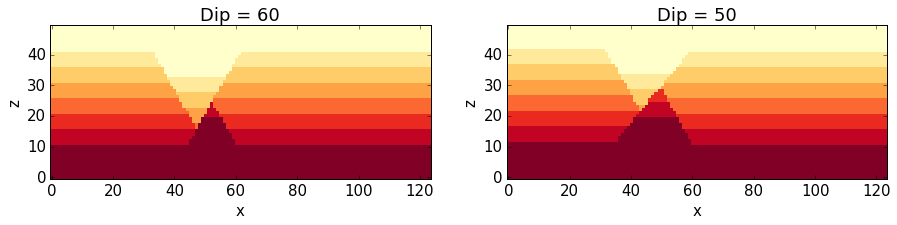

In [50]:
new_history = "dip_changed"
new_output = "dip_changed_out" 
H1.write_history(new_history) 
pynoddy.compute_model(new_history, new_output) 
# load output from both models
NO1 = pynoddy.output.NoddyOutput(output_name) 
NO2 = pynoddy.output.NoddyOutput(new_output)
# create basic figure layout
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
NO1.plot_section('y', position=0, ax = ax1, colorbar=False, title="Dip = %.0f" % dip_ori, savefig=True, fig_filename ="tmp.eps") 
NO2.plot_section('y', position=1, ax = ax2, colorbar=False, title="Dip = %.0f" % dip_new)
plt.show()


Changing the order of geological events
---------------------------------------

The geological history is parameterised as single events in a timeline. Changing the order of events can be performed with two basic methods:

1. Swapping two events with a simple command
2. Adjusting the entire timeline with a complete remapping of events

The first method is probably the most useful to test how a simple change in the order of events will effect the final geological model. We will use it here with our example to test how the model would change if the timing of the faults is swapped.

The method to swap two geological events is defined on the level of the history object:

In [51]:
H1 = pynoddy.history.NoddyHistory(history_ori)

In [52]:
# The names of the two fault events defined in the history file are:
print H1.events[2].name
print H1.events[3].name

Fault2
Fault1


We now swap the position of two events in the kinematic history. For this purpose, a high-level function can directly be used:

In [53]:
# Now: swap the events:
H1.swap_events(2,3)

In [54]:
# And let's check if this is correctly relfected in the events order now:
print H1.events[2].name
print H1.events[3].name

Fault1
Fault2


Now let's create a new history file and evaluate the effect of the changed order in a cross section view:

In [55]:
new_history = "faults_changed_order.his"
new_output = "faults_out"
H1.write_history(new_history)
pynoddy.compute_model(new_history, new_output)

''

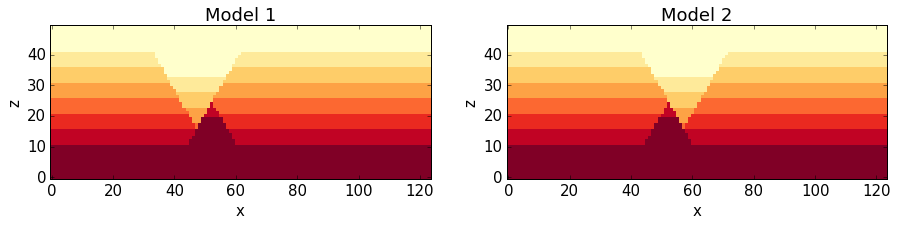

In [56]:
reload(pynoddy.output)
# Load and compare both models
NO1 = pynoddy.output.NoddyOutput(output_name)
NO2 = pynoddy.output.NoddyOutput(new_output)
# create basic figure layout
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
NO1.plot_section('y', ax = ax1, colorbar=False, title="Model 1")
NO2.plot_section('y', ax = ax2, colorbar=False, title="Model 2")

plt.show()


Determining the stratigraphic difference between two models
------------------------------------------------------------

Just as another quick example of a possible application of pynoddy to evaluate aspects that are not simply possible with, for example, the GUI version of Noddy itself. In the last example with the changed order of the faults, we might be interested to determine where in space this change had an effect. We can test this quite simply using the `NoddyOutput` objects. 

The geology data is stored in the `NoddyOutput.block` attribute. To evaluate the difference between two models, we can therefore simply compute:

In [57]:
diff = (NO2.block - NO1.block)

And create a simple visualisation of the difference in a slice plot with:

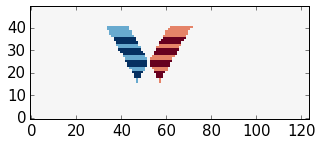

In [58]:
fig = plt.figure(figsize = (5,3))
ax = fig.add_subplot(111)
ax.imshow(diff[:,10,:].transpose(), interpolation='nearest', 
          cmap = "RdBu", origin = 'lower left')

(Adding a meaningful title and axis labels to the plot is left to the reader as simple excercise :-) Future versions of pynoddy might provide an automatic implementation for this step...)

Again, we may want to visualise results in 3-D. We can use the `export_to_vtk`-function as before, but now assing the data array to be exported as the calulcated differnce field:

In [59]:
NO1.export_to_vtk(vtk_filename = "model_diff", data = diff)

A 3-D view of the difference plot is presented below.

![3-D visualisation of stratigraphic id difference](3-Events_files/diff_3d_3.png "3-D visualisation of stratigraphic id difference")